# Data Sprint 6: Face Mask Detection
### Can you build a model to detect mask on a face?

![alt](<https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/maks.jpg>)

# Context

Coronavirus has now become the talk of the town, most people in the world right now are suffering badly and every day thousands of people are dying because of COVID-19. As per WHO, face masks combined with other preventive measures such as frequent hand-washing and social distancing help slow down the spread of the coronavirus.

# Objective

As we are aware, WHO has recommended that even healthy people should wear masks when venturing out of their homes into places where it is difficult to maintain distance from other people. 

Imagine a local housing community has started capturing images of individuals at the entrance/exit gates, public places in and around the housing society. With this image dataset, they want to identify whether an individual in the community has worn a mask or not. Identifying the individuals would further help them to create awareness about the importance of wearing a mask to the specific set of individuals who are not complying to it. So the need is to classify images, by building a machine/deep learning model to detect face masks.

# Evaluation Criteria

Submissions are evaluated using Accuracy Score.

![alt](<https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/accuracy_score.png>) 

# About the Data

The training dataset consists of 11,264 medium quality face images belonging to two categories - with_mask (i.e. face is covered with mask) and without_mask (no mask on the face).

Dataset [Link](<https://drive.google.com/file/d/1_W2gFFZmy6ZyC8TPlxB49eDFswdBsQqo/view?usp=sharing>)

**There are 4 files:**

From the above link you will be able to download a zip file named ‘face_mask_detection.zip’. After you extract this zip file, you will get four files:

  * **train** - contains all the images to be used for building the model.
  * **Training_set_face_mask** - contains the target value for each of the images in the train folder with their corresponding image name
  * **test** - contains all the images for whose the predictions of the labels/target are to be submitted on DPhi platform
  * **Testing_set_face_mask** - all the names of the images in the test folder are placed in an order in this csv file. The predictions of the images are to be submitted in the same order as specified in this csv file.

# Acknowledgements

The images are downloaded from multiple sources like Google images, pexels.com, etc. The images used in this data science challenge is only for educational purposes.

# TASK 1: Loading Data 

In [ ]:
#installing necessary packages required

In [ ]:
pip install opencv.python

     |████████████████████████████████| 49.4MB 79kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
#importing libraries 
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
#set the seed
from numpy.random import seed
seed(21)

In [ ]:
#downloading the dataset from drive to Google Colab

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id = '1_W2gFFZmy6ZyC8TPlxB49eDFswdBsQqo',
                                    dest_path='content/face_mask_detection.zip',
                                    unzip=True)

Unzipping...Done.


In [ ]:
#reading training dataset
Training_set_face_mask = pd.read_csv('/content/content/face_mask_detection/Training_set_face_mask.csv')

In [ ]:
#reading testing dataset with header none since there is no header given in testing dataset
Testing_set_face_mask = pd.read_csv('/content/content/face_mask_detection/Testing_set_face_mask.csv')

In [ ]:
#viewing the first five rows content of training dataset
Training_set_face_mask.head() 

,filename,label
0,Image_1.jpg,without_mask
1,Image_2.jpg,without_mask
2,Image_3.jpg,without_mask
3,Image_4.jpg,without_mask
4,Image_5.jpg,without_mask


In [ ]:
#viewing the first five rows content of testing dataset
Testing_set_face_mask.head()

,filename,label
0,Image_1.jpg,NaN
1,Image_2.jpg,NaN
2,Image_3.jpg,NaN
3,Image_4.jpg,NaN
4,Image_5.jpg,NaN


In [ ]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage
Training_set_face_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11264 entries, 0 to 11263
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  11264 non-null  object
 1   label     11264 non-null  object
dtypes: object(2)
memory usage: 176.1+ KB


In [ ]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage
Testing_set_face_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  1536 non-null   object 
 1   label     0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 24.1+ KB


In [ ]:
#finding the total rows and columns of training dataset
Training_set_face_mask.shape

(11264, 2)

In [ ]:
#finding the total rows and columns of testing dataset
Testing_set_face_mask.shape

(1536, 2)

In [ ]:
#checking column names
Training_set_face_mask.columns

Index(['filename', 'label'], dtype='object')

In [ ]:
#checking column names
Testing_set_face_mask.columns

Index(['filename', 'label'], dtype='object')

In [ ]:
#checking the balance of the dataset
#it is a binary classification having two labels so we can use sigmoid activation function in the last output layer of our DL model
Training_set_face_mask['label'].value_counts()

without_mask    5632
with_mask       5632
Name: label, dtype: int64

In [ ]:
# getting the path of all image files
filepaths_train = ['/content/content/face_mask_detection/train/' + fname[:-4] + '.jpg' for fname in Training_set_face_mask['filename']]
filepaths_train

['/content/content/face_mask_detection/train/Image_1.jpg',
 '/content/content/face_mask_detection/train/Image_2.jpg',
 '/content/content/face_mask_detection/train/Image_3.jpg',
 '/content/content/face_mask_detection/train/Image_4.jpg',
 '/content/content/face_mask_detection/train/Image_5.jpg',
 '/content/content/face_mask_detection/train/Image_6.jpg',
 '/content/content/face_mask_detection/train/Image_7.jpg',
 '/content/content/face_mask_detection/train/Image_8.jpg',
 '/content/content/face_mask_detection/train/Image_9.jpg',
 '/content/content/face_mask_detection/train/Image_10.jpg',
 '/content/content/face_mask_detection/train/Image_11.jpg',
 '/content/content/face_mask_detection/train/Image_12.jpg',
 '/content/content/face_mask_detection/train/Image_13.jpg',
 '/content/content/face_mask_detection/train/Image_14.jpg',
 '/content/content/face_mask_detection/train/Image_15.jpg',
 '/content/content/face_mask_detection/train/Image_16.jpg',
 '/content/content/face_mask_detection/train/Imag

In [ ]:
# getting the path of all image files
filepaths_test = ['/content/content/face_mask_detection/test/' + fname[:-4] + '.jpg' for fname in Testing_set_face_mask['filename']]
filepaths_test

['/content/content/face_mask_detection/test/Image_1.jpg',
 '/content/content/face_mask_detection/test/Image_2.jpg',
 '/content/content/face_mask_detection/test/Image_3.jpg',
 '/content/content/face_mask_detection/test/Image_4.jpg',
 '/content/content/face_mask_detection/test/Image_5.jpg',
 '/content/content/face_mask_detection/test/Image_6.jpg',
 '/content/content/face_mask_detection/test/Image_7.jpg',
 '/content/content/face_mask_detection/test/Image_8.jpg',
 '/content/content/face_mask_detection/test/Image_9.jpg',
 '/content/content/face_mask_detection/test/Image_10.jpg',
 '/content/content/face_mask_detection/test/Image_11.jpg',
 '/content/content/face_mask_detection/test/Image_12.jpg',
 '/content/content/face_mask_detection/test/Image_13.jpg',
 '/content/content/face_mask_detection/test/Image_14.jpg',
 '/content/content/face_mask_detection/test/Image_15.jpg',
 '/content/content/face_mask_detection/test/Image_16.jpg',
 '/content/content/face_mask_detection/test/Image_17.jpg',
 '/con

In [ ]:
# Confirm if number of images is same as number of labels given
if len(Training_set_face_mask) == len(filepaths_train):
  print('Number of labels i.e. ', len(Training_set_face_mask), 'matches the number of filenames i.e. ', len(filepaths_train))
else:
  print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  11264 matches the number of filenames i.e.  11264


In [ ]:
# Confirm if number of images is same as number of labels given
if len(Testing_set_face_mask) == len(filepaths_test):
  print('Number of labels i.e. ', len(Testing_set_face_mask), 'matches the number of filenames i.e. ', len(filepaths_test))
else:
  print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  1536 matches the number of filenames i.e.  1536


# TASK 2: Pre-processing

In [ ]:
#creating a column filepath to have the path of the images in its respective filename
#converting animal_type column from object dtype to numeric dtype using apply method so we know 0 represents mucca and 1 pecora so that we can convert our submission prediction as per submission requirements
#we will be using Sequential() model with sigmoid activation function in the last output layer that gives binary classification
train_images = [[fname, '/content/content/face_mask_detection/train/' + fname[:-4] + '.jpg'] for fname in Training_set_face_mask['filename']]
trainimages = pd.DataFrame(train_images)
trainimages.columns = ['filename', 'filepath']
trainimages['label'] = Training_set_face_mask['label'].apply(lambda x: 0 if x == 'without_mask' else 1)
trainimages.head()


,filename,filepath,label
0,Image_1.jpg,/content/content/face_mask_detection/train/Ima...,0
1,Image_2.jpg,/content/content/face_mask_detection/train/Ima...,0
2,Image_3.jpg,/content/content/face_mask_detection/train/Ima...,0
3,Image_4.jpg,/content/content/face_mask_detection/train/Ima...,0
4,Image_5.jpg,/content/content/face_mask_detection/train/Ima...,0


In [ ]:
#creating a column filepath to have the path of the images in its respective filename
test_images = [[fname, '/content/content/face_mask_detection/test/' + fname[:-4] + '.jpg'] for fname in Testing_set_face_mask['filename']]
testimages = pd.DataFrame(test_images)
testimages.columns = ['filename', 'filepath']
testimages.head()

,filename,filepath
0,Image_1.jpg,/content/content/face_mask_detection/test/Imag...
1,Image_2.jpg,/content/content/face_mask_detection/test/Imag...
2,Image_3.jpg,/content/content/face_mask_detection/test/Imag...
3,Image_4.jpg,/content/content/face_mask_detection/test/Imag...
4,Image_5.jpg,/content/content/face_mask_detection/test/Imag...


In [ ]:
#checking the new column filepath count and column animal_type dtype
trainimages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11264 entries, 0 to 11263
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  11264 non-null  object
 1   filepath  11264 non-null  object
 2   label     11264 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 264.1+ KB


In [ ]:
#checking the new column filepath count
testimages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1536 non-null   object
 1   filepath  1536 non-null   object
dtypes: object(2)
memory usage: 24.1+ KB


0
without mask


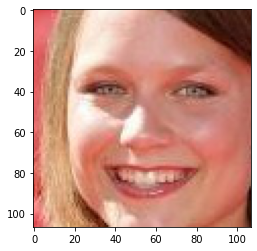

1
without mask


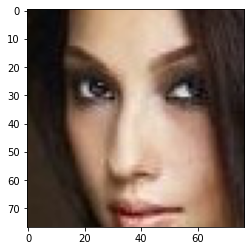

2
without mask


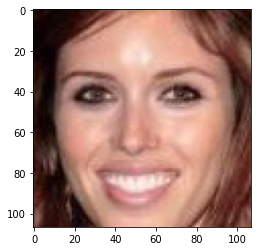

3
without mask


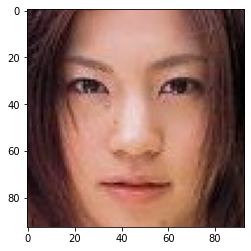

4
without mask


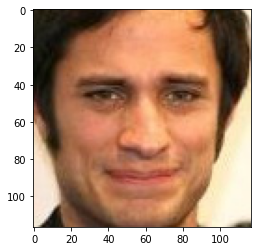

5
without mask


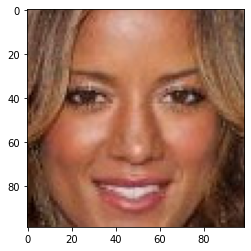

6
without mask


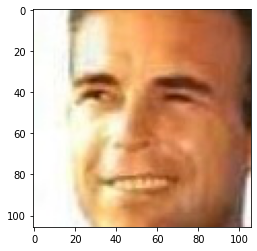

7
without mask


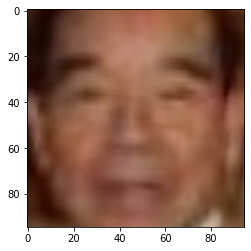

8
without mask


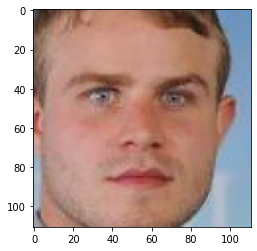

9
without mask


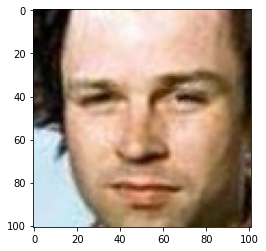

10
without mask


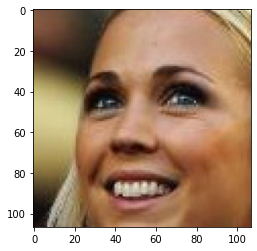

11254
with mask


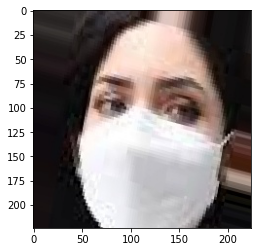

11255
with mask


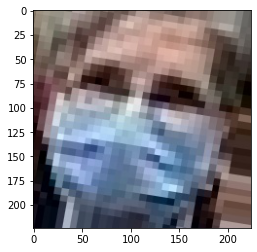

11256
with mask


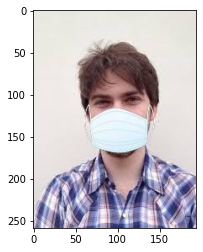

11257
with mask


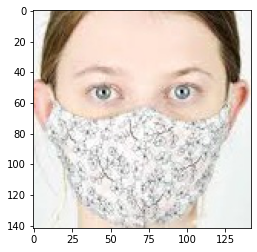

11258
with mask


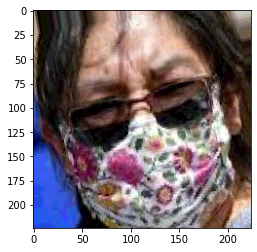

11259
with mask


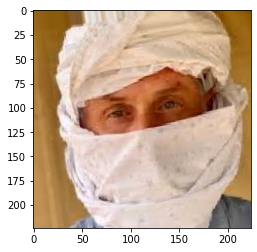

11260
with mask


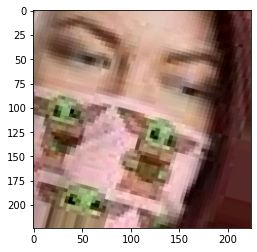

11261
with mask


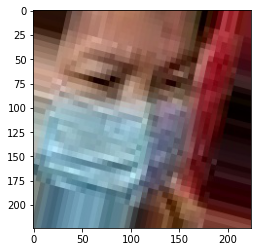

11262
with mask


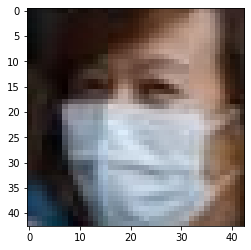

11263
with mask


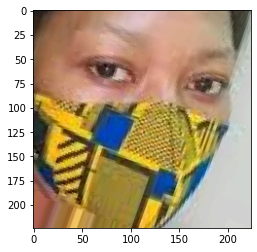

In [ ]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline

for index, row in trainimages.iterrows():
  print(index)
  img = row['filepath']
  name = row['label']
  if name == 0:
    print('without mask')
  else:
    print('with mask')
  facemask_images = mpimg.imread(img)
  imshow(facemask_images)
  cv2.waitKey(0)
  plt.show()
  if index == 10:
    break

for index, row in trainimages.iterrows():
  if index >= 11254:
    print(index)
    img = row['filepath']
    name = row['label']
    if name == 0:
      print('without mask')
    else:
      print('with mask')
    facemask_images = mpimg.imread(img)
    imshow(facemask_images)
    cv2.waitKey(0)
    plt.show()

In [ ]:
#reading the image file from the filepath column and converting to grayscale
#grayscale to make all colour and black-and-white images to same level
#also grayscale make an image file to 2 dimensional array whereas colour BGR (according to cv2 read and not RGB) creates 3 dimensional array
#since we will be using simple Sequential() DL model and not CNN DL model so grayscale simple 2 dimensional array wll be good for better performance
trainingimg = [] 
for index, row in trainimages.iterrows():
  img = row['filepath']
  img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  img_array = cv2.resize(img_array,(107,107))
  trainingimg.append(img_array)
  

In [ ]:
#reading the image file from the filepath column and converting to grayscale
testingimg = []
for index, row in testimages.iterrows():
  testimg = row['filepath']
  testimg_array = cv2.imread(testimg, cv2.IMREAD_GRAYSCALE)
  testimg_array = cv2.resize(testimg_array,(107,107))
  testingimg.append(testimg_array)

In [ ]:
#checking the len of the array whether it matches our training dataset rows
len(trainingimg)

11264

In [ ]:
#checking the len of the array whether it matches our testing dataset rows
len(testingimg)

1536

In [ ]:
#checking the dimension of the array
trainingimg[0].shape

(107, 107)

In [ ]:
#checking the dimension of the array
testingimg[0].shape

(107, 107)

In [ ]:
#print to view the dimension
print(trainingimg[0])

[[119 119 119 ...  36  45  48]
 [125 126 126 ...  43  35  46]
 [131 132 132 ...  43  33  42]
 ...
 [127 112 137 ...  72  51  25]
 [118 115 136 ...  77  58  31]
 [118 128 139 ...  81  64  36]]


In [ ]:
#checking the type now we can use reshape or flatten to make it from 2 dimension to 1 dimension
type(trainingimg[0])

numpy.ndarray

In [ ]:
#converting 2 dimensional images value to 1 dimensiona and creating a new list of images read having 1 dimensional
newtrainingimg = []
for x in trainingimg:
  newtrainingimg.append(x.flatten())

newtrainingimg[0].shape


(11449,)

In [ ]:
#checking the type now we can use reshape or flatten to make it from 2 dimension to 1 dimension
type(testingimg[0])

numpy.ndarray

In [ ]:
#converting list to numpy ndarray as tensorflow doesnot support list
newtrainingimg = np.asarray(newtrainingimg).astype(np.float32)

In [ ]:
#checking for type
type(newtrainingimg)

numpy.ndarray

In [ ]:
#Normalizing the pixel values
newtrainingimg = newtrainingimg / 255.0

In [ ]:
#checking the value of the element at position 0
newtrainingimg[0]

array([0.46666667, 0.46666667, 0.46666667, ..., 0.31764707, 0.2509804 ,
       0.14117648], dtype=float32)

In [ ]:
#converting 2 dimensional images value to 1 dimensiona and creating a new list of images read having 1 dimensional
newtestingimg = []
for x in testingimg:
  newtestingimg.append(x.flatten())

newtestingimg[0].shape


(11449,)

In [ ]:
#converting list to numpy ndarray as tensorflow doesnot support list
newtestingimg = np.asarray(newtestingimg).astype(np.float32)

In [ ]:
type(newtestingimg)

numpy.ndarray

In [ ]:
#Normalizing the pixel values
newtestingimg = newtestingimg / 255.0

In [ ]:
#checking the value of the element at position 0
newtestingimg[0]

array([0.2627451 , 0.20784314, 0.1882353 , ..., 0.01960784, 0.01568628,
       0.01176471], dtype=float32)

In [ ]:
#creating a new training dataset with read images values and animal type
newtrainimages = pd.DataFrame(newtrainingimg)
newtrainimages['label'] = trainimages['label']

In [ ]:
#viewing the first 5 rows of new training dataset to check
newtrainimages.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11410,11411,11412,11413,11414,11415,11416,11417,11418,11419,11420,11421,11422,11423,11424,11425,11426,11427,11428,11429,11430,11431,11432,11433,11434,11435,11436,11437,11438,11439,11440,11441,11442,11443,11444,11445,11446,11447,11448,label
0,0.466667,0.466667,0.466667,0.466667,0.466667,0.470588,0.478431,0.482353,0.482353,0.564706,0.533333,0.505882,0.596078,0.709804,0.631373,0.596078,0.647059,0.631373,0.607843,0.596078,0.603922,0.600000,0.611765,0.619608,0.603922,0.768627,0.823529,0.886275,0.905882,0.925490,0.941176,0.956863,0.956863,0.972549,0.980392,0.976471,0.968627,0.956863,0.949020,0.941176,...,0.647059,0.647059,0.639216,0.631373,0.627451,0.627451,0.607843,0.568627,0.533333,0.517647,0.509804,0.501961,0.517647,0.498039,0.478431,0.458824,0.439216,0.439216,0.458824,0.470588,0.478431,0.517647,0.533333,0.552941,0.564706,0.556863,0.552941,0.556863,0.556863,0.529412,0.537255,0.517647,0.490196,0.462745,0.435294,0.372549,0.317647,0.250980,0.141176,0
1,0.062745,0.058824,0.058824,0.058824,0.054902,0.050980,0.050980,0.054902,0.054902,0.050980,0.039216,0.039216,0.039216,0.039216,0.043137,0.031373,0.039216,0.062745,0.050980,0.070588,0.125490,0.227451,0.243137,0.274510,0.317647,0.341176,0.376471,0.411765,0.447059,0.486275,0.525490,0.560784,0.592157,0.619608,0.639216,0.654902,0.670588,0.682353,0.698039,0.709804,...,0.611765,0.639216,0.690196,0.760784,0.772549,0.756863,0.717647,0.709804,0.721569,0.725490,0.713726,0.686275,0.666667,0.654902,0.635294,0.611765,0.592157,0.572549,0.564706,0.541176,0.509804,0.482353,0.450980,0.419608,0.388235,0.380392,0.368627,0.349020,0.313726,0.282353,0.254902,0.235294,0.200000,0.180392,0.188235,0.227451,0.196078,0.188235,0.196078,0
2,0.133333,0.082353,0.058824,0.043137,0.035294,0.070588,0.094118,0.058824,0.066667,0.043137,0.023529,0.027451,0.039216,0.039216,0.043137,0.050980,0.054902,0.066667,0.062745,0.054902,0.050980,0.050980,0.058824,0.074510,0.101961,0.101961,0.137255,0.117647,0.160784,0.160784,0.172549,0.184314,0.243137,0.317647,0.333333,0.321569,0.360784,0.384314,0.333333,0.345098,...,0.678431,0.611765,0.584314,0.596078,0.576471,0.533333,0.529412,0.482353,0.305882,0.258824,0.400000,0.600000,0.729412,0.698039,0.482353,0.435294,0.388235,0.392157,0.396078,0.341176,0.294118,0.270588,0.270588,0.172549,0.152941,0.145098,0.207843,0.294118,0.282353,0.203922,0.180392,0.274510,0.325490,0.380392,0.435294,0.419608,0.396078,0.384314,0.376471,0
3,0.121569,0.203922,0.137255,0.058824,0.078431,0.168627,0.215686,0.211765,0.125490,0.200000,0.235294,0.231373,0.192157,0.168627,0.250980,0.184314,0.227451,0.227451,0.317647,0.317647,0.250980,0.282353,0.258824,0.298039,0.200000,0.211765,0.247059,0.290196,0.349020,0.368627,0.364706,0.380392,0.439216,0.474510,0.498039,0.525490,0.556863,0.588235,0.600000,0.615686,...,0.533333,0.552941,0.521569,0.494118,0.470588,0.450980,0.431373,0.419608,0.423529,0.411765,0.400000,0.396078,0.372549,0.325490,0.290196,0.301961,0.282353,0.305882,0.274510,0.211765,0.156863,0.145098,0.168627,0.160784,0.156863,0.156863,0.156863,0.145098,0.109804,0.090196,0.145098,0.149020,0.168627,0.125490,0.094118,0.070588,0.086275,0.160784,0.203922,0
4,0.133333,0.160784,0.125490,0.094118,0.086275,0.117647,0.152941,0.149020,0.094118,0.121569,0.141176,0.152941,0.145098,0.113725,0.098039,0.121569,0.149020,0.141176,0.113725,0.105882,0.109804,0.105882,0.101961,0.090196,0.082353,0.082353,0.078431,0.078431,0.078431,0.078431,0.066667,0.082353,0.082353,0.082353,0.105882,0.117647,0.117647,0.129412,0.164706,0.176471,...,0.196078,0.196078,0.227451,0.298039,0.396078,0.482353,0.549020,0.580392,0.603922,0.588235,0.588235,0.552941,0.447059,0.466667,0.631373,0.709804,0.784314,0.854902,0.913725,0.941176,0.945098,0.952941,0.964706,0.972549,0.968627,0.949020,0.929412,0.866667,0.800000,0.701961,0.584314,0.411765,0.254902,0.184314,0.219608,0.278431,0.321569,0.286275,0.211765,0


In [ ]:
#shuffling the rows of the DataFrame using the sample() method with the parameter frac as 1, which determines what fraction of total instances need to be returned.
#we are performing this because animal_type column has its value somewhat together so this will ensure that our X_train and X_test dataset while will be representative of our original dataset
newtrainimages = newtrainimages.sample(frac = 1) 

In [ ]:
#checking the shuffle
newtrainimages.head(21)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11410,11411,11412,11413,11414,11415,11416,11417,11418,11419,11420,11421,11422,11423,11424,11425,11426,11427,11428,11429,11430,11431,11432,11433,11434,11435,11436,11437,11438,11439,11440,11441,11442,11443,11444,11445,11446,11447,11448,label
9367,0.592157,0.654902,0.670588,0.701961,0.709804,0.717647,0.737255,0.741176,0.745098,0.752941,0.752941,0.752941,0.752941,0.749020,0.749020,0.749020,0.749020,0.749020,0.752941,0.752941,0.752941,0.749020,0.749020,0.745098,0.749020,0.756863,0.760784,0.764706,0.760784,0.760784,0.760784,0.756863,0.756863,0.752941,0.749020,0.749020,0.749020,0.749020,0.749020,0.749020,...,0.752941,0.760784,0.756863,0.752941,0.721569,0.717647,0.670588,0.607843,0.596078,0.600000,0.603922,0.482353,0.450980,0.172549,0.023529,0.019608,0.023529,0.023529,0.015686,0.011765,0.011765,0.015686,0.015686,0.019608,0.027451,0.027451,0.047059,0.062745,0.070588,0.090196,0.109804,0.117647,0.121569,0.160784,0.168627,0.160784,0.109804,0.137255,0.141176,1
9039,0.090196,0.074510,0.066667,0.058824,0.043137,0.047059,0.062745,0.066667,0.050980,0.011765,0.019608,0.031373,0.043137,0.039216,0.031373,0.047059,0.062745,0.054902,0.031373,0.043137,0.117647,0.250980,0.380392,0.427451,0.419608,0.403922,0.423529,0.462745,0.482353,0.498039,0.513726,0.533333,0.545098,0.552941,0.560784,0.564706,0.572549,0.572549,0.576471,0.580392,...,0.270588,0.286275,0.301961,0.298039,0.301961,0.309804,0.313726,0.309804,0.298039,0.298039,0.298039,0.298039,0.286275,0.258824,0.239216,0.223529,0.215686,0.215686,0.207843,0.207843,0.215686,0.188235,0.200000,0.207843,0.211765,0.215686,0.250980,0.258824,0.286275,0.337255,0.360784,0.333333,0.321569,0.368627,0.505882,0.607843,0.647059,0.674510,0.701961,1
10076,0.282353,0.301961,0.305882,0.309804,0.341176,0.337255,0.341176,0.349020,0.403922,0.403922,0.403922,0.415686,0.419608,0.423529,0.458824,0.545098,0.545098,0.549020,0.596078,0.600000,0.600000,0.607843,0.615686,0.615686,0.615686,0.600000,0.596078,0.596078,0.592157,0.588235,0.584314,0.588235,0.576471,0.580392,0.592157,0.568627,0.572549,0.584314,0.588235,0.549020,...,0.439216,0.443137,0.415686,0.129412,0.125490,0.129412,0.054902,0.027451,0.027451,0.035294,0.043137,0.043137,0.043137,0.090196,0.090196,0.094118,0.117647,0.145098,0.149020,0.149020,0.231373,0.239216,0.235294,0.243137,0.498039,0.501961,0.498039,0.431373,0.372549,0.372549,0.372549,0.423529,0.427451,0.427451,0.521569,0.556863,0.556863,0.541176,0.447059,1
4729,0.298039,0.243137,0.223529,0.203922,0.250980,0.286275,0.282353,0.219608,0.247059,0.262745,0.235294,0.207843,0.207843,0.219608,0.215686,0.274510,0.325490,0.341176,0.380392,0.400000,0.384314,0.376471,0.376471,0.372549,0.352941,0.329412,0.301961,0.305882,0.364706,0.352941,0.333333,0.309804,0.309804,0.329412,0.282353,0.250980,0.270588,0.235294,0.215686,0.188235,...,0.462745,0.141176,0.078431,0.145098,0.121569,0.121569,0.176471,0.129412,0.172549,0.180392,0.188235,0.192157,0.200000,0.215686,0.223529,0.227451,0.231373,0.235294,0.235294,0.223529,0.219608,0.223529,0.223529,0.215686,0.207843,0.200000,0.200000,0.215686,0.196078,0.196078,0.196078,0.168627,0.149020,0.152941,0.184314,0.188235,0.168627,0.168627,0.172549,0
10674,0.168627,0.168627,0.172549,0.172549,0.172549,0.160784,0.145098,0.149020,0.192157,0.239216,0.258824,0.239216,0.219608,0.227451,0.258824,0.290196,0.270588,0.207843,0.149020,0.109804,0.082353,0.054902,0.058824,0.074510,0.086275,0.058824,0.027451,0.000000,0.050980,0.101961,0.152941,0.184314,0.211765,0.235294,0.231373,0.231373,0.239216,0.258824,0.278431,0.294118,...,0.454902,0.454902,0.458824,0.466667,0.478431,0.486275,0.482353,0.474510,0.462745,0.450980,0.435294,0.423529,0.415686,0.403922,0.392157,0.368627,0.349020,0.325490,0.313726,0.298039,0.294118,0.301961,0.313726,0.329412,0.352941,0.372549,0.376471,0.360784,0.345098,0.356863,0.388235,0.415686,0.431373,0.443137,0.450980,0.427451,0.392157,0.356863,0.356863,1
9809,0.121569,0.145098,0.152941,0

In [ ]:
#overview of our new training dataset
newtrainimages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11264 entries, 9367 to 5327
Columns: 11450 entries, 0 to label
dtypes: float32(11449), int64(1)
memory usage: 492.1 MB


In [ ]:
#creating a new testing dataset with read images values
newtestimages = pd.DataFrame(newtestingimg)

In [ ]:
#viewing the first 5 rows of new testing dataset to check
newtestimages.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11409,11410,11411,11412,11413,11414,11415,11416,11417,11418,11419,11420,11421,11422,11423,11424,11425,11426,11427,11428,11429,11430,11431,11432,11433,11434,11435,11436,11437,11438,11439,11440,11441,11442,11443,11444,11445,11446,11447,11448
0,0.262745,0.207843,0.188235,0.219608,0.250980,0.333333,0.403922,0.356863,0.360784,0.415686,0.454902,0.474510,0.498039,0.525490,0.529412,0.537255,0.537255,0.541176,0.541176,0.537255,0.533333,0.537255,0.545098,0.552941,0.556863,0.556863,0.560784,0.560784,0.560784,0.564706,0.572549,0.568627,0.576471,0.588235,0.600000,0.611765,0.619608,0.623529,0.631373,0.635294,...,0.537255,0.517647,0.552941,0.490196,0.490196,0.466667,0.431373,0.266667,0.039216,0.023529,0.015686,0.011765,0.011765,0.011765,0.011765,0.015686,0.015686,0.011765,0.007843,0.011765,0.015686,0.015686,0.019608,0.015686,0.011765,0.007843,0.011765,0.015686,0.015686,0.011765,0.007843,0.007843,0.011765,0.015686,0.015686,0.019608,0.019608,0.019608,0.015686,0.011765
1,0.337255,0.239216,0.231373,0.196078,0.164706,0.168627,0.156863,0.156863,0.164706,0.168627,0.168627,0.172549,0.168627,0.156863,0.152941,0.149020,0.137255,0.141176,0.137255,0.137255,0.121569,0.109804,0.113725,0.113725,0.113725,0.105882,0.105882,0.098039,0.090196,0.086275,0.074510,0.078431,0.082353,0.090196,0.094118,0.078431,0.078431,0.062745,0.054902,0.047059,...,0.000000,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023529,0.027451,0.011765,0.000000,0.000000,0.003922,0.000000,0.035294,0.043137,0.043137,0.023529,0.027451,0.039216,0.039216,0.043137,0.054902,0.062745,0.192157,0.203922,0.207843,0.211765,0.215686,0.219608,0.219608,0.219608,0.219608
2,0.450980,0.454902,0.458824,0.439216,0.407843,0.415686,0.388235,0.403922,0.368627,0.317647,0.298039,0.329412,0.403922,0.435294,0.278431,0.200000,0.207843,0.219608,0.266667,0.360784,0.439216,0.486275,0.501961,0.505882,0.517647,0.525490,0.529412,0.552941,0.623529,0.694118,0.694118,0.647059,0.611765,0.615686,0.631373,0.643137,0.658824,0.678431,0.690196,0.694118,...,0.415686,0.415686,0.415686,0.419608,0.415686,0.411765,0.403922,0.392157,0.396078,0.407843,0.396078,0.364706,0.313726,0.274510,0.247059,0.235294,0.243137,0.254902,0.266667,0.274510,0.274510,0.270588,0.266667,0.266667,0.262745,0.258824,0.254902,0.254902,0.250980,0.247059,0.243137,0.239216,0.239216,0.247059,0.250980,0.254902,0.258824,0.266667,0.266667,0.266667
3,0.070588,0.070588,0.074510,0.078431,0.086275,0.090196,0.098039,0.105882,0.109804,0.113725,0.113725,0.117647,0.117647,0.113725,0.113725,0.109804,0.109804,0.109804,0.109804,0.109804,0.125490,0.141176,0.160784,0.176471,0.180392,0.188235,0.192157,0.188235,0.180392,0.172549,0.164706,0.168627,0.168627,0.172549,0.192157,0.219608,0.250980,0.278431,0.290196,0.301961,...,0.313726,0.317647,0.325490,0.325490,0.329412,0.329412,0.329412,0.329412,0.325490,0.321569,0.321569,0.321569,0.321569,0.317647,0.309804,0.301961,0.294118,0.286275,0.282353,0.282353,0.278431,0.270588,0.262745,0.254902,0.254902,0.258824,0.262745,0.266667,0.282353,0.298039,0.313726,0.317647,0.301961,0.286275,0.274510,0.266667,0.258824,0.254902,0.250980,0.250980
4,0.811765,0.807843,0.811765,0.815686,0.811765,0.815686,0.831373,0.839216,0.854902,0.705882,0.650980,0.647059,0.647059,0.423529,0.360784,0.360784,0.368627,0.454902,0.454902,0.450980,0.427451,0.439216,0.454902,0.474510,0.435294,0.431373,0.423529,0.415686,0.403922,0.407843,0.407843,0.411765,0.411765,0.411765,0.411765,0.415686,0.415686,0.415686,0.411765,0.396078,...,0.956863,0.956863,0.956863,0.956863,0.956863,0.956863,0.964706,0.980392,0.980392,0.980392,0.980392,0.972549,0.956863,0.937255,0.713726,0.792157,0.800000,0.788235,0.305882,0.254902,0.250980,0.274510,0.290196,0.290196,0.294118,0.360784,0.349020,0.341176,0.321569,0.270588,0.270588,0.274510,0.290196,0.294118,0.294118,0.294118,0.333333,0.352941,0.352941,0.356863


In [ ]:
#overview of our new testing dataset
newtestimages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Columns: 11449 entries, 0 to 11448
dtypes: float32(11449)
memory usage: 67.1 MB


In [ ]:
#initializing the X (independent variables) and y (dependent variable)
X = newtrainimages.drop('label', axis = 1)
y = newtrainimages['label']

In [ ]:
#checking the shape of X variable
X.shape

(11264, 11449)

# TASK 3: Building a Multi-Layer Perceptron

In [ ]:
#importing libraries
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [ ]:
#checking the X_train column shape
X.shape[1]

11449

In [ ]:
#building the model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# TASK 4: Optimizer

In [ ]:
#compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [ ]:
#printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              11724800  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 12,381,185
Trainable params: 12,381,185
Non-trainable params: 0
_________________________________________________________________


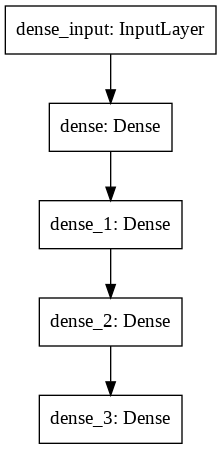

In [ ]:
#plotting the model flowchart
from tensorflow.keras.utils import plot_model
plot_model(model)

# TASK 5: Training the model


In [ ]:
#trainig the model taking two epochs as the output of previous model training showed good accuracy on second epochs
model.fit(X, y, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
1127/1127 [==============================] - 124s 110ms/step - loss: 0.6975 - accuracy: 0.7058
Epoch 2/200
1127/1127 [==============================] - 127s 113ms/step - loss: 0.4098 - accuracy: 0.8250
Epoch 3/200
1127/1127 [==============================] - 122s 108ms/step - loss: 0.3632 - accuracy: 0.8469
Epoch 4/200
1127/1127 [==============================] - 121s 108ms/step - loss: 0.3420 - accuracy: 0.8572
Epoch 5/200
1127/1127 [==============================] - 125s 111ms/step - loss: 0.3276 - accuracy: 0.8660
Epoch 6/200
1127/1127 [==============================] - 125s 111ms/step - loss: 0.3223 - accuracy: 0.8683
Epoch 7/200
1127/1127 [==============================] - 120s 107ms/step - loss: 0.3127 - accuracy: 0.8733
Epoch 8/200
1127/1127 [==============================] - 119s 106ms/step - loss: 0.3068 - accuracy: 0.8784
Epoch 9/200
1127/1127 [==============================] - 118s 104ms/step - loss: 0.3034 - accuracy: 0.8766
Epoch 10/200
1127/1127 [=============

# TASK 6 : Predict


In [ ]:
#predicting the new test dataset
predictions = (model.predict(newtestimages) > 0.5).astype("int32")

In [ ]:
#finding the shape of predictions
predictions.shape

(1536, 1)

In [ ]:
#converting the predicted 0 and 1 to respective animal names
facemask_label = ['without_mask' , 'with_mask']

namepredictions = []

for i in predictions:
  for x in i:
    namepredictions.append([facemask_label[x]])

#converting list to numpy ndarray as predictions
namepredictions = np.asarray(namepredictions).astype(np.str)

In [ ]:
#checking the shape is same as predictions
namepredictions.shape

(1536, 1)

In [ ]:
#creating Dataframe of predicted value with particular respective index
res = pd.DataFrame(namepredictions) #namepreditions are the final predictions of the model on input features of the unseen new test dataset
res.index = newtestimages.index # its important for comparison. Here newtestimages is the new test dataset
res.columns = ['label']

#download the csv file locally
from google.colab import files
res.to_csv('submissionfileA.csv')         
files.download('submissionfileA.csv') # got accuracy: 91.080729 on new test dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#trainig the model taking two epochs as the output of previous model training showed good accuracy on second epochs
model.fit(X, y, epochs=350, batch_size=10, verbose=1)

Epoch 1/350
1127/1127 [==============================] - 118s 105ms/step - loss: 0.6996 - accuracy: 0.7177
Epoch 2/350
1127/1127 [==============================] - 120s 107ms/step - loss: 0.4035 - accuracy: 0.8298
Epoch 3/350
1127/1127 [==============================] - 124s 110ms/step - loss: 0.3752 - accuracy: 0.8466
Epoch 4/350
1127/1127 [==============================] - 117s 104ms/step - loss: 0.3563 - accuracy: 0.8570
Epoch 5/350
1127/1127 [==============================] - 114s 101ms/step - loss: 0.3441 - accuracy: 0.8614
Epoch 6/350
1127/1127 [==============================] - 114s 101ms/step - loss: 0.3341 - accuracy: 0.8661
Epoch 7/350
1127/1127 [==============================] - 122s 108ms/step - loss: 0.3265 - accuracy: 0.8692
Epoch 8/350
1127/1127 [==============================] - 131s 116ms/step - loss: 0.3249 - accuracy: 0.8789
Epoch 9/350
1127/1127 [==============================] - 133s 118ms/step - loss: 0.3149 - accuracy: 0.8795
Epoch 10/350
1127/1127 [=============

In [ ]:
#predicting the new test dataset
predictions_two = (model.predict(newtestimages) > 0.5).astype("int32")

In [ ]:
#converting the predicted 0 and 1 to respective animal names

namepredictions_two = []
facemask_label = ['without_mask' , 'with_mask']

for i in predictions_two:
  for x in i:
    namepredictions_two.append([facemask_label[x]])

#converting list to numpy ndarray as predictions
namepredictions_two = np.asarray(namepredictions_two).astype(np.str)

In [ ]:
#creating Dataframe of predicted value with particular respective index
res_two = pd.DataFrame(namepredictions_two) #namepreditions are the final predictions of the model on input features of the unseen new test dataset
res_two.index = newtestimages.index # its important for comparison. Here newtestimages is the new test dataset
res_two.columns = ['label']

#download the csv file locally
from google.colab import files
res_two.to_csv('submissionfileA_two.csv')         
files.download('submissionfileA_two.csv') # got accuracy: 91.40625 on new test dataset

# TASK 7 : Optimization Techniques

In [ ]:
#clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
#building the model with lesser perceptrons 
modelB = Sequential()
modelB.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))   
modelB.add(Dense(256, activation='relu'))
modelB.add(Dense(128, activation='relu'))
modelB.add(Dense(1, activation='sigmoid'))

In [ ]:
#compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizerB = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
modelB.compile(loss='binary_crossentropy', optimizer= optimizerB , metrics=['accuracy'])

In [ ]:
#printing the summary of the model
modelB.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5862400   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 6,026,753
Trainable params: 6,026,753
Non-trainable params: 0
_________________________________________________________________


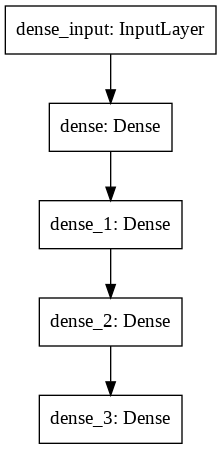

In [ ]:
#plotting the model flowchart
from tensorflow.keras.utils import plot_model
plot_model(modelB)

In [ ]:
#training the model
modelB.fit(X, y, epochs=350, batch_size=10, verbose=1)

Epoch 1/350
1127/1127 [==============================] - 30s 27ms/step - loss: 0.6916 - accuracy: 0.7109
Epoch 2/350
1127/1127 [==============================] - 31s 28ms/step - loss: 0.4154 - accuracy: 0.8193
Epoch 3/350
1127/1127 [==============================] - 32s 28ms/step - loss: 0.3799 - accuracy: 0.8415
Epoch 4/350
1127/1127 [==============================] - 32s 29ms/step - loss: 0.3548 - accuracy: 0.8504
Epoch 5/350
1127/1127 [==============================] - 29s 26ms/step - loss: 0.3533 - accuracy: 0.8622
Epoch 6/350
1127/1127 [==============================] - 29s 26ms/step - loss: 0.3517 - accuracy: 0.8627
Epoch 7/350
1127/1127 [==============================] - 30s 26ms/step - loss: 0.3310 - accuracy: 0.8720
Epoch 8/350
1127/1127 [==============================] - 29s 26ms/step - loss: 0.3430 - accuracy: 0.8681
Epoch 9/350
1127/1127 [==============================] - 29s 26ms/step - loss: 0.3398 - accuracy: 0.8699
Epoch 10/350
1127/1127 [==============================]

In [ ]:
#predicting the new test dataset
predictionsB = (modelB.predict(newtestimages) > 0.5).astype("int32")

In [ ]:
#converting the predicted 0 and 1 to respective animal names
namepredictionsB = []
facemask_label = ['without_mask' , 'with_mask']

for i in predictionsB:
  for x in i:
    namepredictionsB.append([facemask_label[x]])

#converting list to numpy ndarray as predictions
namepredictionsB = np.asarray(namepredictionsB).astype(np.str)

In [ ]:
#creating Dataframe of predicted value with particular respective index
resB = pd.DataFrame(namepredictionsB) #namepreditions are the final predictions of the model on input features of the unseen new test dataset
resB.index = newtestimages.index # its important for comparison. Here newtestimages is the new test dataset
resB.columns = ['label']

#download the csv file locally
from google.colab import files
resB.to_csv('submissionfileB.csv')         
files.download('submissionfileB.csv') # got accuracy: 91.731771 on new test dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
#building the model with Optimization Techniques 
finalmodel = Sequential()
finalmodel.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))  
tf.keras.layers.Dropout(0.1) 
finalmodel.add(Dense(128, activation='relu'))
tf.keras.layers.Dropout(0.1)
finalmodel.add(Dense(128, activation='relu'))
tf.keras.layers.Dropout(0.1)
finalmodel.add(Dense(1, activation='sigmoid'))

In [ ]:
#compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizerB = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
finalmodel.compile(loss='binary_crossentropy', optimizer= optimizerB , metrics=['accuracy'])

In [ ]:
#printing the summary of the model
finalmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               1465600   
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 1,498,753
Trainable params: 1,498,753
Non-trainable params: 0
_________________________________________________________________


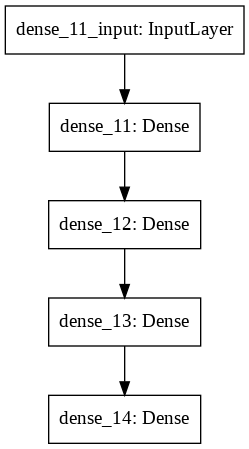

In [ ]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(finalmodel)

In [ ]:
#training the model
finalmodel.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
1127/1127 [==============================] - 9s 8ms/step - loss: 0.5832 - accuracy: 0.7316
Epoch 2/100
1127/1127 [==============================] - 9s 8ms/step - loss: 0.3856 - accuracy: 0.8319
Epoch 3/100
1127/1127 [==============================] - 9s 8ms/step - loss: 0.3564 - accuracy: 0.8517
Epoch 4/100
1127/1127 [==============================] - 9s 8ms/step - loss: 0.3386 - accuracy: 0.8598
Epoch 5/100
1127/1127 [==============================] - 10s 9ms/step - loss: 0.3176 - accuracy: 0.8730
Epoch 6/100
1127/1127 [==============================] - 9s 8ms/step - loss: 0.3129 - accuracy: 0.8737
Epoch 7/100
1127/1127 [==============================] - 9s 8ms/step - loss: 0.3071 - accuracy: 0.8757
Epoch 8/100
1127/1127 [==============================] - 9s 8ms/step - loss: 0.3099 - accuracy: 0.8778
Epoch 9/100
1127/1127 [==============================] - 9s 8ms/step - loss: 0.2979 - accuracy: 0.8788
Epoch 10/100
1127/1127 [==============================] - 9s 8ms/step - 

In [ ]:
#predicting the new test dataset
finalpredictions = (finalmodel.predict(newtestimages) > 0.5).astype("int32")

In [ ]:
#converting the predicted 0 and 1 to respective animal names
namefinalpredictions = []

for i in finalpredictions:
  for x in i:
    namefinalpredictions.append([facemask_label[x]])

#converting list to numpy ndarray as predictions
namefinalpredictions = np.asarray(namefinalpredictions).astype(np.str)

In [ ]:
#creating Dataframe of predicted value with particular respective index
finalres = pd.DataFrame(namefinalpredictions) #namepreditions are the final predictions of the model on input features of the unseen new test dataset
finalres.index = newtestimages.index # its important for comparison. Here newtestimages is the new test dataset
finalres.columns = ['label']

#download the csv file locally
from google.colab import files
finalres.to_csv('submissionfileFinal.csv')         
files.download('submissionfileFinal.csv') # got accuracy: 91.992188 on new test dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#compiling the model
finalmodel.compile(loss='binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [ ]:
#printing the summary of the model
finalmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1465600   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,498,753
Trainable params: 1,498,753
Non-trainable params: 0
_________________________________________________________________


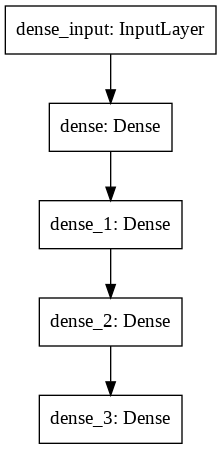

In [ ]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(finalmodel)

In [ ]:
#training the model
finalmodel.fit(X, y, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
1127/1127 [==============================] - 12s 11ms/step - loss: 0.4803 - accuracy: 0.7653
Epoch 2/200
1127/1127 [==============================] - 12s 11ms/step - loss: 0.3768 - accuracy: 0.8384
Epoch 3/200
1127/1127 [==============================] - 12s 11ms/step - loss: 0.3406 - accuracy: 0.8546
Epoch 4/200
1127/1127 [==============================] - 12s 11ms/step - loss: 0.3180 - accuracy: 0.8651
Epoch 5/200
1127/1127 [==============================] - 12s 11ms/step - loss: 0.3224 - accuracy: 0.8671
Epoch 6/200
1127/1127 [==============================] - 12s 11ms/step - loss: 0.3015 - accuracy: 0.8776
Epoch 7/200
1127/1127 [==============================] - 12s 11ms/step - loss: 0.2945 - accuracy: 0.8817
Epoch 8/200
1127/1127 [==============================] - 12s 11ms/step - loss: 0.2846 - accuracy: 0.8846
Epoch 9/200
1127/1127 [==============================] - 12s 11ms/step - loss: 0.2896 - accuracy: 0.8798
Epoch 10/200
1127/1127 [==============================]

In [ ]:
#predicting the new test dataset
finalpredictions_two = (finalmodel.predict(newtestimages) > 0.5).astype("int32")

In [ ]:
#converting the predicted 0 and 1 to respective animal names
namefinalpredictions_two = []
facemask_label = ['without_mask' , 'with_mask']

for i in finalpredictions_two:
  for x in i:
    namefinalpredictions_two.append([facemask_label[x]])

#converting list to numpy ndarray as predictions
namefinalpredictions_two = np.asarray(namefinalpredictions_two).astype(np.str)

In [ ]:
#creating Dataframe of predicted value with particular respective index
finalres_two = pd.DataFrame(namefinalpredictions_two) #namepreditions are the final predictions of the model on input features of the unseen new test dataset
finalres_two.index = newtestimages.index # its important for comparison. Here newtestimages is the new test dataset
finalres_two.columns = ['label']

#download the csv file locally
from google.colab import files
finalres_two.to_csv('submissionfileFinal_two.csv')         
files.download('submissionfileFinal_two.csv') # got accuracy: 92.1875 on new test dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
#building the model with Optimization Techniques 
finalmodelA = Sequential()
finalmodelA.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))   
finalmodelA.add(Dense(64, activation='relu'))
finalmodelA.add(Dense(32, activation='relu'))
finalmodelA.add(Dense(1, activation='sigmoid'))

In [ ]:
#compiling the model
#from tensorflow.keras.optimizers import RMSprop
#optimizerA = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
finalmodelA.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#printing the summary of the model
finalmodelA.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               1465600   
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 1,475,969
Trainable params: 1,475,969
Non-trainable params: 0
_________________________________________________________________


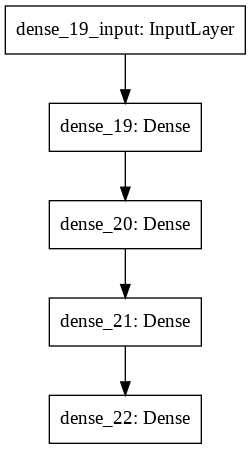

In [ ]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(finalmodelA)

In [ ]:
#training the model
finalmodelA.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
1127/1127 [==============================] - 7s 6ms/step - loss: 0.4803 - accuracy: 0.7698
Epoch 2/100
1127/1127 [==============================] - 7s 6ms/step - loss: 0.3543 - accuracy: 0.8497
Epoch 3/100
1127/1127 [==============================] - 7s 6ms/step - loss: 0.3183 - accuracy: 0.8673
Epoch 4/100
1127/1127 [==============================] - 7s 6ms/step - loss: 0.3060 - accuracy: 0.8681
Epoch 5/100
1127/1127 [==============================] - 7s 6ms/step - loss: 0.2926 - accuracy: 0.8761
Epoch 6/100
1127/1127 [==============================] - 7s 6ms/step - loss: 0.2860 - accuracy: 0.8812
Epoch 7/100
1127/1127 [==============================] - 7s 6ms/step - loss: 0.2672 - accuracy: 0.8893
Epoch 8/100
1127/1127 [==============================] - 7s 6ms/step - loss: 0.2695 - accuracy: 0.8866
Epoch 9/100
1127/1127 [==============================] - 7s 6ms/step - loss: 0.2488 - accuracy: 0.8952
Epoch 10/100
1127/1127 [==============================] - 7s 6ms/step - l

In [ ]:
#predicting the new test dataset
finalpredictionsA = (finalmodelA.predict(newtestimages) > 0.5).astype("int32")

In [ ]:
#converting the predicted 0 and 1 to respective animal names
namefinalpredictionsA = []

for i in finalpredictionsA:
  for x in i:
    namefinalpredictionsA.append([facemask_label[x]])

#converting list to numpy ndarray as predictions
namefinalpredictionsA = np.asarray(namefinalpredictionsA).astype(np.str)

In [ ]:
#creating Dataframe of predicted value with particular respective index
finalresA = pd.DataFrame(namefinalpredictionsA) #namepreditions are the final predictions of the model on input features of the unseen new test dataset
finalresA.index = newtestimages.index # its important for comparison. Here newtestimages is the new test dataset
finalresA.columns = ['label']

#download the csv file locally
from google.colab import files
finalresA.to_csv('submissionfileFinalA.csv')         
files.download('submissionfileFinalA.csv') # got accuracy: 92.96875 on new test dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import sys
import pickle

projectabspathname = os.path.abspath("Data_Sprint_6_Face_Mask_Detection.pickle")
print(projectabspathname)
projectname = 'Data_Sprint_6_Face_Mask_Detection.ipynb'
projectdeploy = open(str(projectabspathname),"wb")
pickle.dump(projectname, projectdeploy)
projectdeploy.close()

/content/Data_Sprint_6_Face_Mask_Detection.pickle
